<a href="https://colab.research.google.com/github/harshapimpale55/pga26/blob/main/RTA_Severity_df_hp55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:** The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task.

#$Import Packages $#

In [ ]:
#Let's define the essential libraries required.
import numpy as np                                   #for array
import pandas as pd                                  #for dataframe
import matplotlib.pyplot as plt                      #for visualization
%matplotlib inline
import seaborn as sns                                #for visualization

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
import warnings ; warnings.filterwarnings('ignore')  #for warnings->codes run smoother
print("######################################")
print("       Imported Key Packages            ")
print("######################################")

######################################
       Imported Key Packages            
######################################


#$Import Data$#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/MGP/RTA Dataset.csv")

In [ ]:
#lets make copy of our dataset
df=dataset.copy()

#$Exploratory Data Analysis$#

In [ ]:
df.shape

(12316, 32)

In [ ]:
df.head()#this function shows first 5 rows of dataset

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.tail()#this function shows the last rows of dataset

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
df.sample(10)#It visualize the 10 random rows of Dataset

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7166,18:08:00,Tuesday,31-50,Male,Elementary school,Employee,Above 10yr,Other,Owner,1-2yr,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Going straight,na,na,na,na,NaN,Other,Not a Pedestrian,Driving carelessly,Serious Injury
6239,15:15:00,Wednesday,31-50,Male,Above high school,Owner,5-10yr,Pick up upto 10Q,Owner,Above 10yr,NaN,Church areas,Two-way (divided with broken lines road marking),Steep grade upward with mountainous terrain,No junction,Asphalt roads,Dry,Daylight,Normal,NaN,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
9855,16:53:00,Wednesday,18-30,Male,Elementary school,Employee,Below 1yr,Automobile,Owner,5-10yrs,No defect,School areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,1,1,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
129,8:59:00,Monday,Over 51,Male,Elementary school,Employee,5-10yr,Other,Owner,Unknown,No defect,Other,Undivided Two way,Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Turnover,Slight Injury
48,18:19:00,Monday,18-30,Male,Junior high school,Employee,Below 1yr,Stationwagen,Owner,NaN,NaN,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Daylight,Normal,Rollover,2,1,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
4953,19:25:00,Wednesday,31-50,Male,Junior high school,Owner,Below 1yr,Automobile,Owner,1-2yr,NaN,Office areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Gravel roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Male,Under 18,3,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
10298,18:25:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Taxi,Owner,2-5yrs,No defect,Office areas,Double carriageway (median),Escarpments,No junction,Asphalt roads,Wet or damp,Darkness - lights lit,Normal,Vehicle with vehicle collision,1,1,Going straight,Passenger,Female,18-30,3,Driver,Normal,Not a Pedestrian,Driving at high speed,Slight Injury
2787,15:29:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,NaN,No defect,Residential areas,Double carriageway (median),Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,4,Going straight,Driver or rider,Female,31-50,3,Other,Normal,Not a Pedestrian,Other,Slight Injury
6888,15:32:00,Friday,Over 51,Male,Junior high school,Owner,2-5yr,Other,Owner,Unknown,NaN,Other,other,Tangent road with flat terrain,No junction,Asphalt roads,Wet or damp,Daylight,Other,Vehicle with vehicle collision,1,1,Turnover,Passenger,Female,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
3194,12:30:00,Saturday,18-30,Male,Junior high school,Employee,unknown,Stationwagen,Governmental,NaN,No defect,Industrial areas,Undivided Two way,Tangent road with flat terrain,Crossing,Asphalt roads,Wet or damp,Daylight,Raining,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,Male,

In [ ]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured   

In [ ]:
#lets take closer look at the data
print("Dataset Dimensions:- " ,df.shape)
print("*************************")
print("Dataset Column List:- " ,df.columns)
print("*************************")

Dataset Dimensions:-  (12316, 32)
*************************
Dataset Column List:-  Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')
*************************


In [ ]:
# renaming columns
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

In [ ]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df.nunique()

time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [ ]:
df.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
#lets Find Out null values in dataset
total=df.isnull().sum().sort_values(ascending=False)
total

vehicle_defect             4427
service_year               3928
casualty_work              3198
casualty_fitness           2635
vehicle_type                950
junction_type               887
driving_experience          829
educational_level           741
vehicle_driver_relation     579
vehicle_owner               482
lanes                       385
vehicle_movement            308
accident_area               239
surface_type                172
collision_type              155
road_allignment             142
casualty_class                0
pedestrian_movement           0
accident_cause                0
casualty_severity             0
casualty_age                  0
casualty_sex                  0
time                          0
road_surface_conditions       0
casualties                    0
vehicles_involved             0
weather_condition             0
light_condition               0
day_of_week                   0
driver_sex                    0
driver_age                    0
accident

In [ ]:
percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percentage

vehicle_defect             0.359451
service_year               0.318935
casualty_work              0.259662
casualty_fitness           0.213949
vehicle_type               0.077135
junction_type              0.072020
driving_experience         0.067311
educational_level          0.060166
vehicle_driver_relation    0.047012
vehicle_owner              0.039136
lanes                      0.031260
vehicle_movement           0.025008
accident_area              0.019406
surface_type               0.013966
collision_type             0.012585
road_allignment            0.011530
casualty_class             0.000000
pedestrian_movement        0.000000
accident_cause             0.000000
casualty_severity          0.000000
casualty_age               0.000000
casualty_sex               0.000000
time                       0.000000
road_surface_conditions    0.000000
casualties                 0.000000
vehicles_involved          0.000000
weather_condition          0.000000
light_condition            0

In [ ]:
 #counting null values in each column of the dataframe
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)
#we got some null/NaN values in our dataset so we have to work on it 

vehicle_defect             35.95
service_year               31.89
casualty_work              25.97
casualty_fitness           21.39
vehicle_type                7.71
junction_type               7.20
driving_experience          6.73
educational_level           6.02
vehicle_driver_relation     4.70
vehicle_owner               3.91
lanes                       3.13
vehicle_movement            2.50
accident_area               1.94
surface_type                1.40
collision_type              1.26
road_allignment             1.15
casualty_class              0.00
pedestrian_movement         0.00
accident_cause              0.00
casualty_severity           0.00
casualty_age                0.00
casualty_sex                0.00
time                        0.00
road_surface_conditions     0.00
casualties                  0.00
vehicles_involved           0.00
weather_condition           0.00
light_condition             0.00
day_of_week                 0.00
driver_sex                  0.00
driver_age

In [ ]:
missing_values = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in missing_values:
  print(f"{feature} {np.round(df[feature].isnull().mean(), 4)}% missing values")

educational_level 0.0602% missing values
vehicle_driver_relation 0.047% missing values
driving_experience 0.0673% missing values
vehicle_type 0.0771% missing values
vehicle_owner 0.0391% missing values
service_year 0.3189% missing values
vehicle_defect 0.3595% missing values
accident_area 0.0194% missing values
lanes 0.0313% missing values
road_allignment 0.0115% missing values
junction_type 0.072% missing values
surface_type 0.014% missing values
collision_type 0.0126% missing values
vehicle_movement 0.025% missing values
casualty_work 0.2597% missing values
casualty_fitness 0.2139% missing values


In [ ]:
# extracting hour and minute from timestamp
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

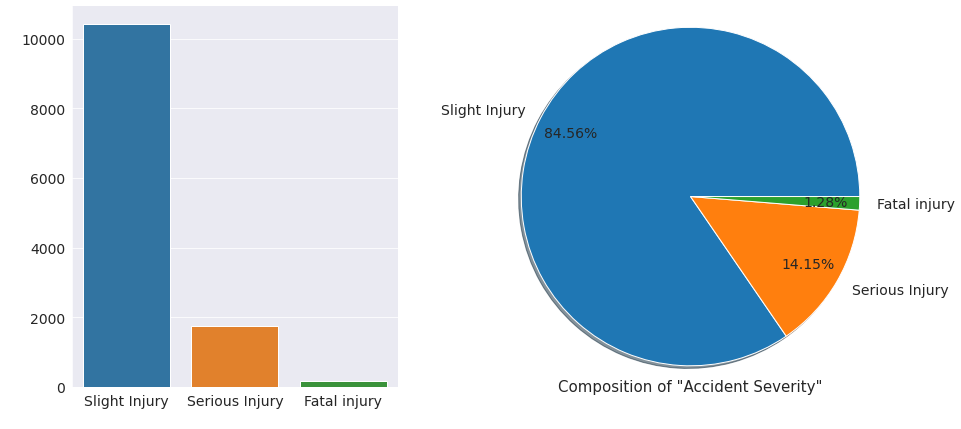

In [ ]:
# visualization of target Variable so we will get idea about the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

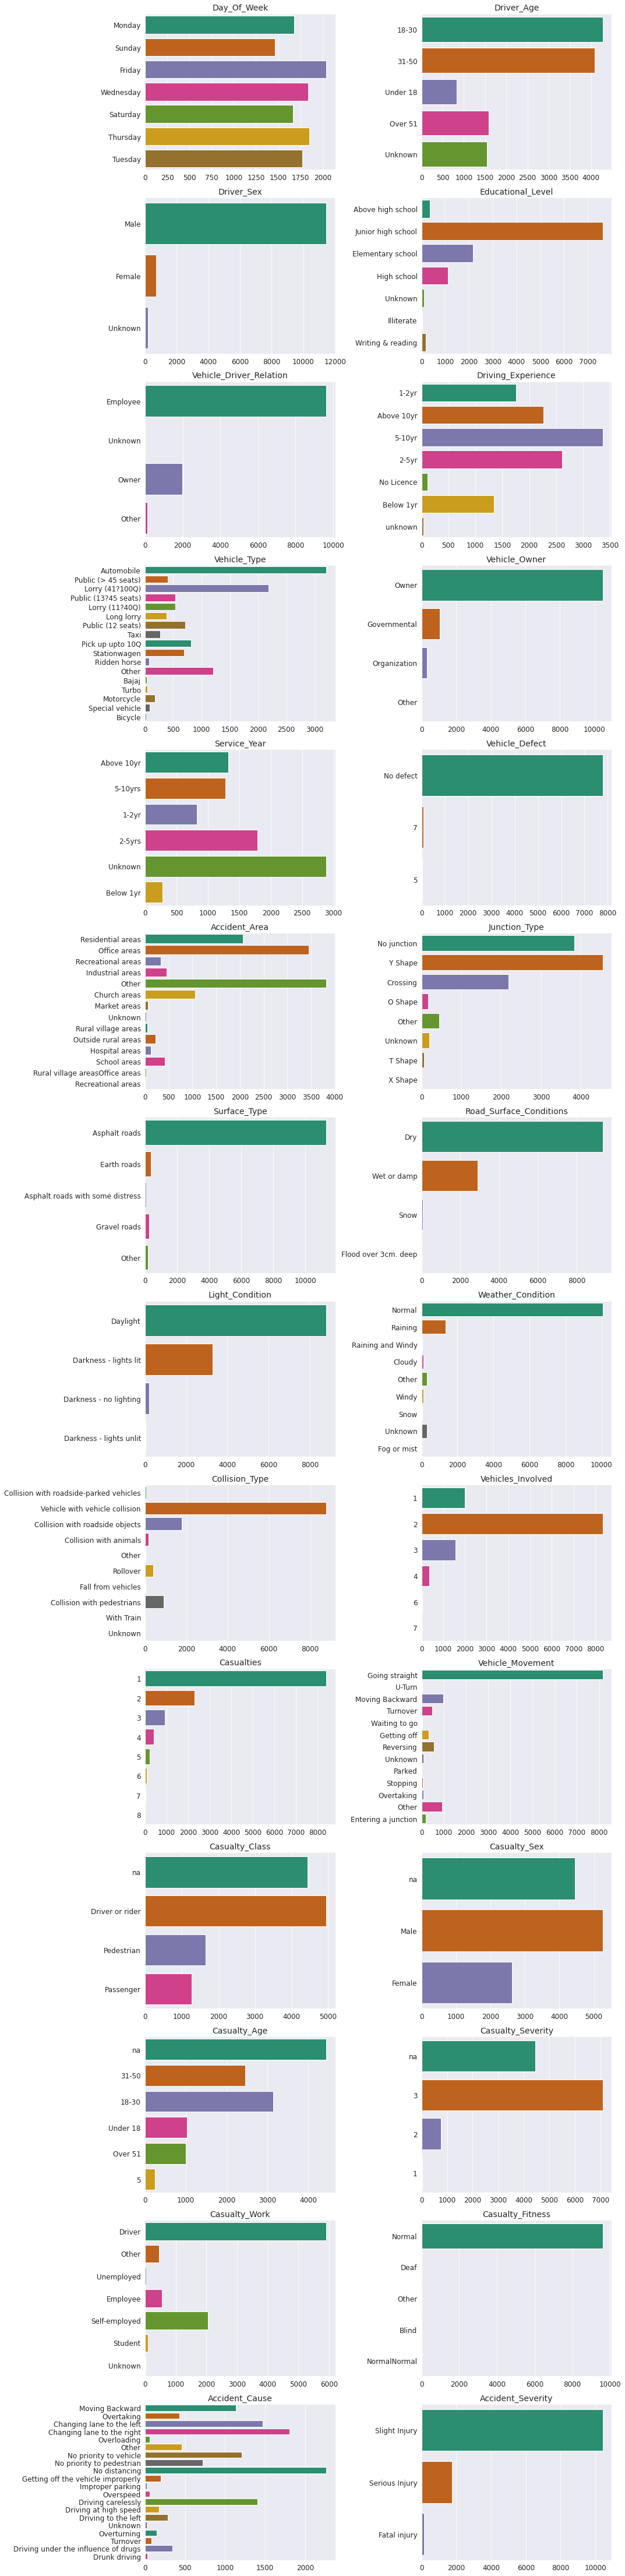

In [ ]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()


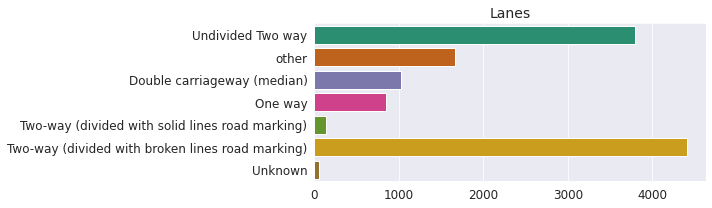

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

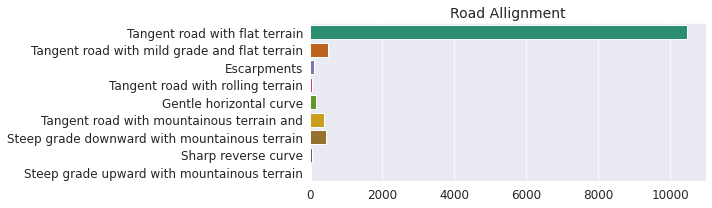

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

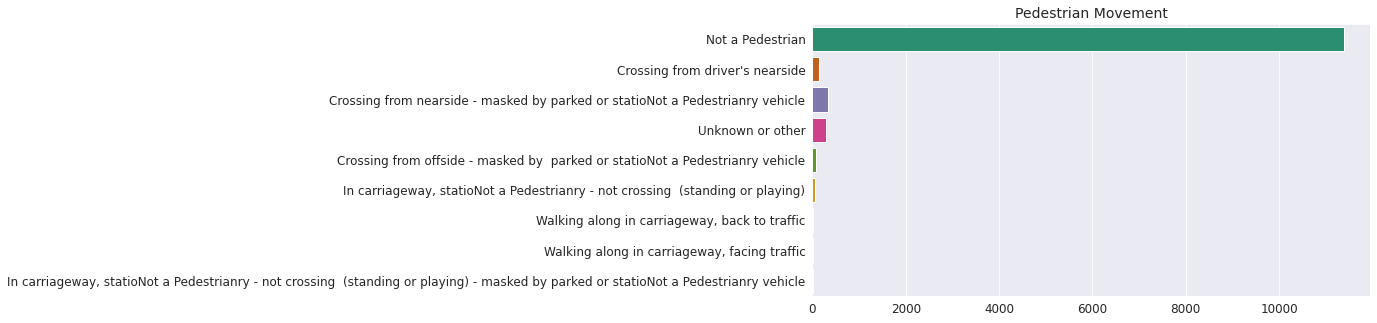

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

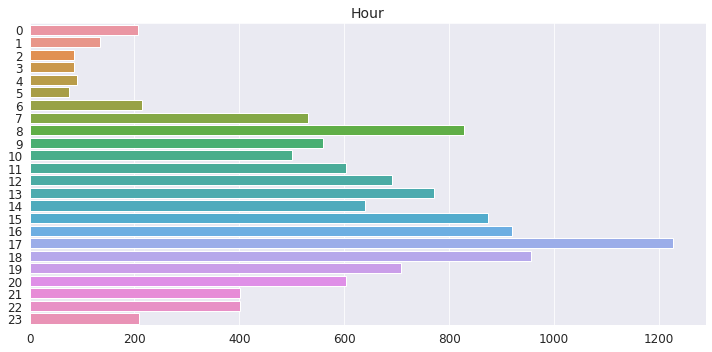

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

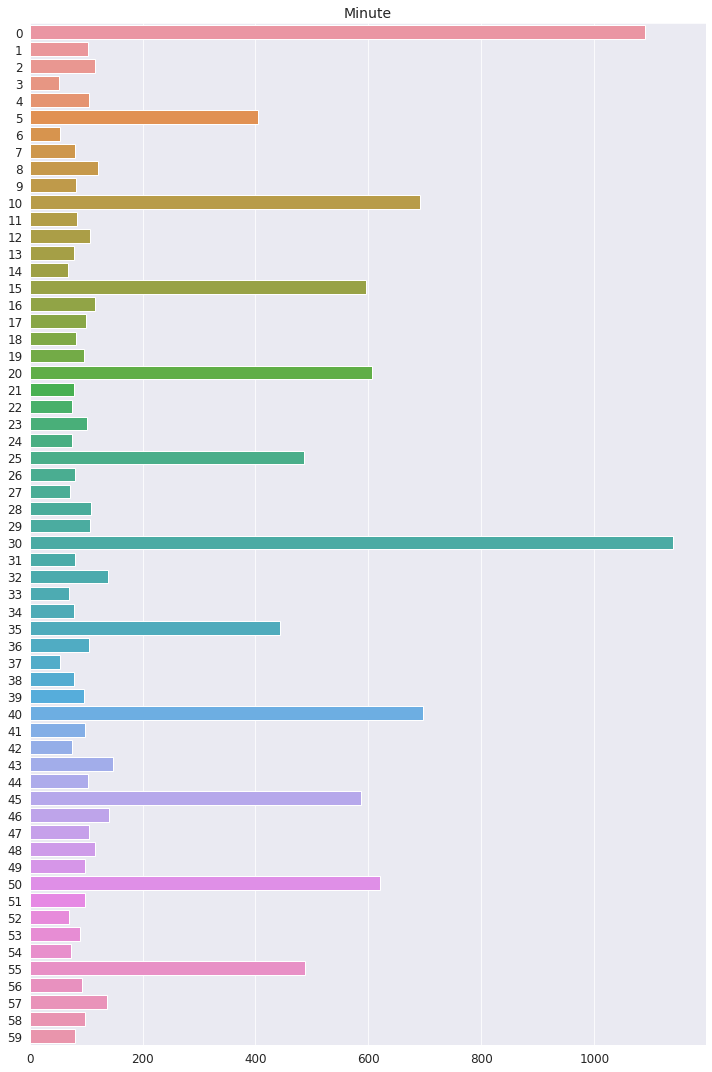

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

####$ Observations$:

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

In [ ]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [ ]:
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

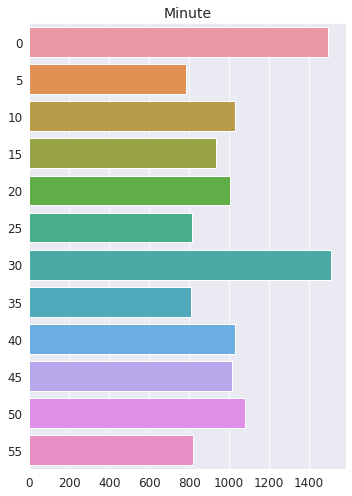

In [ ]:
plt.figure(figsize=(5,7))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols]

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


#$Preprocessing$

In [ ]:
df.isna().sum()[df.isna().sum() != 0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
collision_type              155
vehicle_movement            308
casualty_work              3198
casualty_fitness           2635
dtype: int64

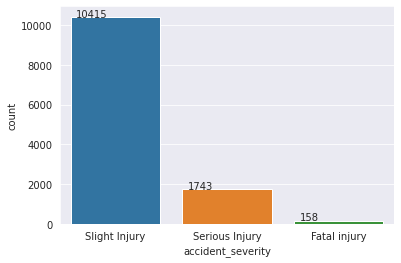

In [ ]:
ax = sns.countplot(x=df["accident_severity"])
for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x()+0.05, p.get_height()+1))

plt.show()

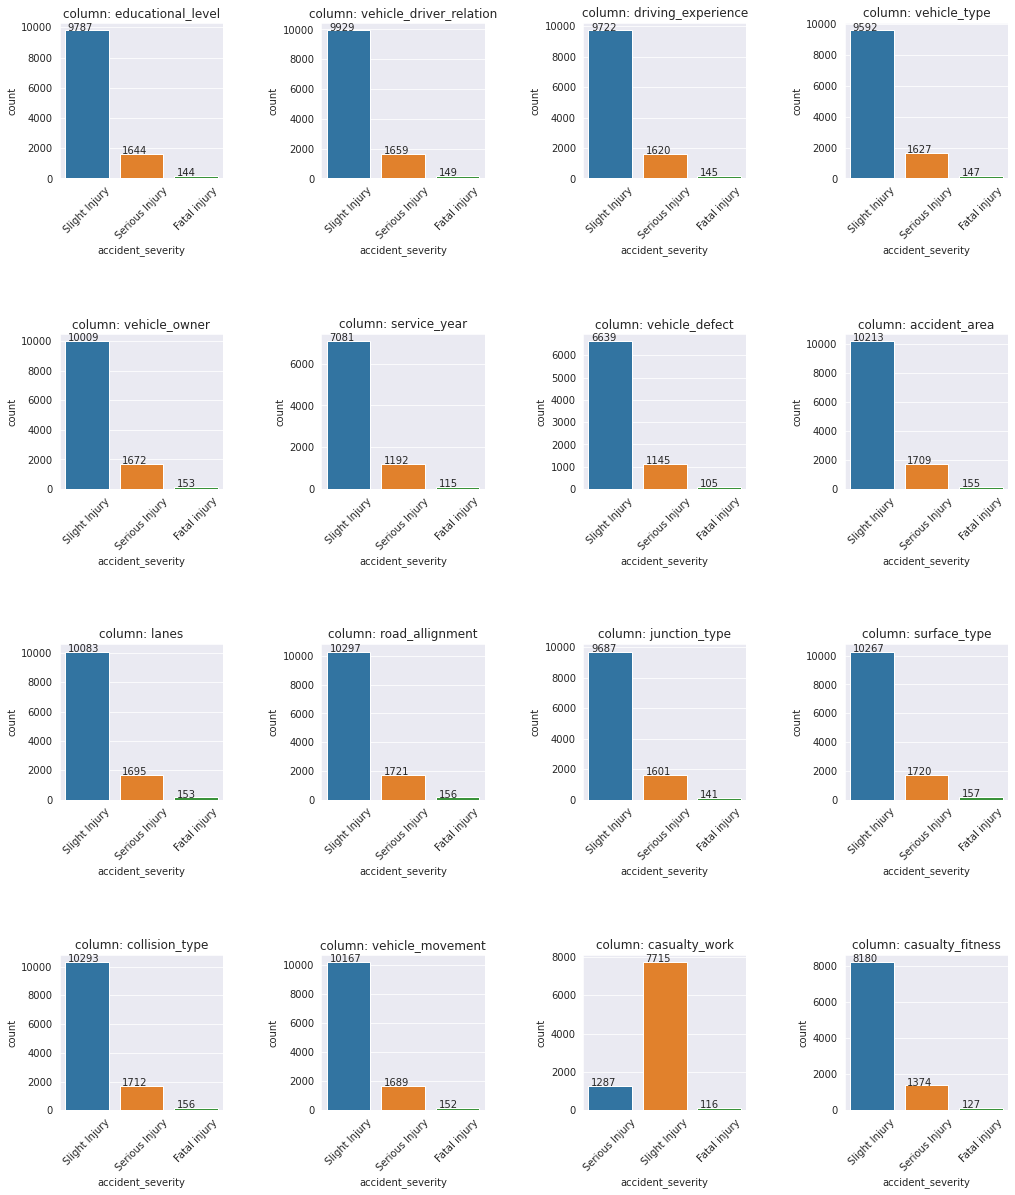

In [ ]:
fig = plt.figure(figsize = (17,20))
fig.subplots_adjust(hspace=1, wspace=0.6)
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
cols = df.isna().sum()[df.isna().sum() != 0].index.tolist()
for i,col in enumerate(cols):
    ax = fig.add_subplot(4, 4, i+1)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    sns.countplot(x=df.dropna(subset=[col])["accident_severity"])
    for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x()+0.05, p.get_height()+1))
    ax.set_title('column: ' + str(col))
plt.show()

In [ ]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness',], inplace=True)

In [ ]:
#filling Missing Values using mode  imputation
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [ ]:
df.isna().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

#$Encoding$

In [ ]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape

(12316, 29)

In [ ]:
df

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,2,1,2,1,1,1,4,4,10,3,6,2,1,1,4,3,4,2,2,3,4,3,6,4,6,10,Slight Injury,18,2
1,2,2,2,5,4,12,4,3,7,5,6,2,1,1,4,3,9,2,2,3,4,3,6,4,6,17,Slight Injury,18,2
2,2,1,2,5,1,6,4,6,2,7,6,2,1,1,4,3,3,2,2,3,1,2,2,3,6,1,Serious Injury,18,2
3,4,1,2,5,3,12,1,6,7,7,7,8,3,1,1,3,9,2,2,3,3,1,1,3,6,2,Slight Injury,2,3
4,4,1,2,5,2,1,4,3,5,7,6,8,1,1,1,3,9,2,2,3,4,3,6,4,6,17,Slight Injury,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,7,2,2,5,2,5,4,6,6,5,6,2,1,1,4,3,9,2,1,3,4,3,6,4,6,11,Slight Injury,17,4
12312,4,5,2,2,3,1,4,6,6,3,1,2,1,1,4,3,9,2,1,5,4,3,6,4,6,11,Slight Injury,19,1
12313,4,3,2,5,3,2,4,2,6,3,8,2,1,1,4,3,9,1,1,5,1,2,2,3,6,2,Serious Injury,14,12
12314,4,1,1,5,4,6,4,2,7,5,8,2,1,1,1,3,9,2,1,5,4,3,6,4,6,6,Slight Injury,14,12


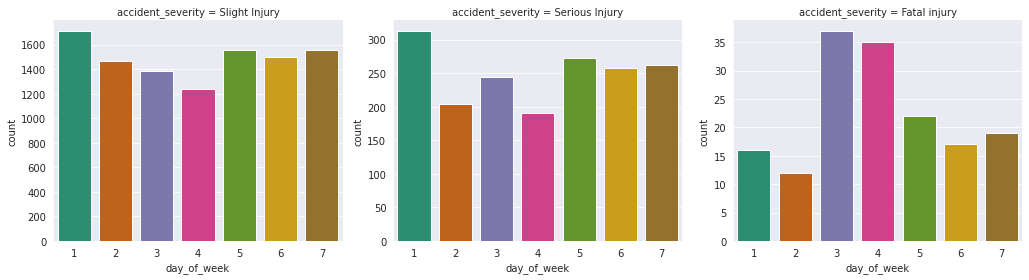

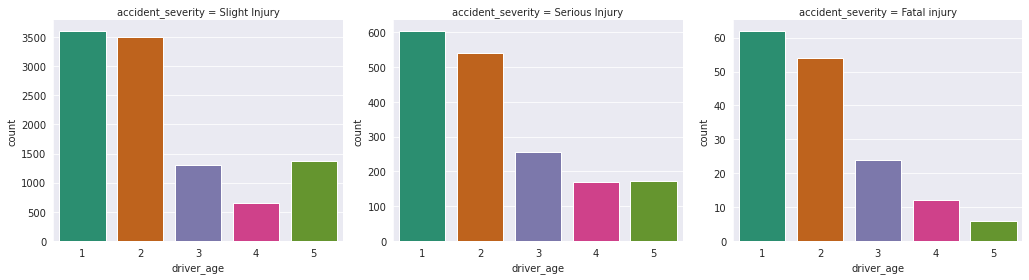

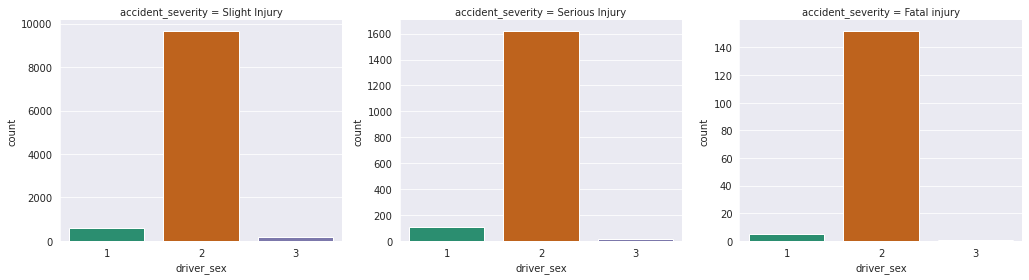

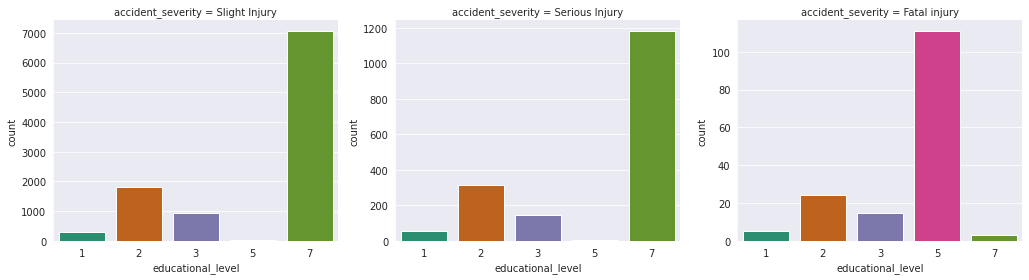

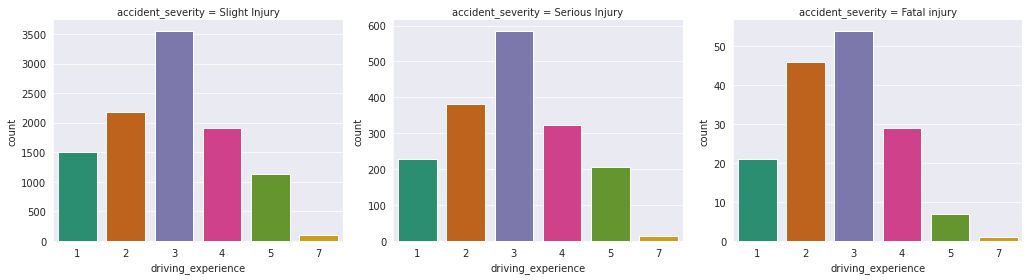

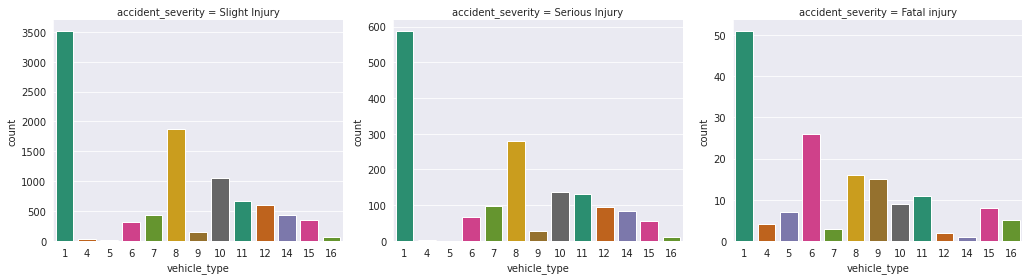

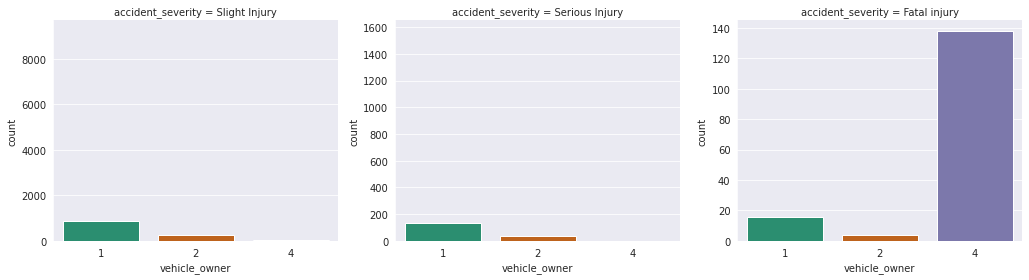

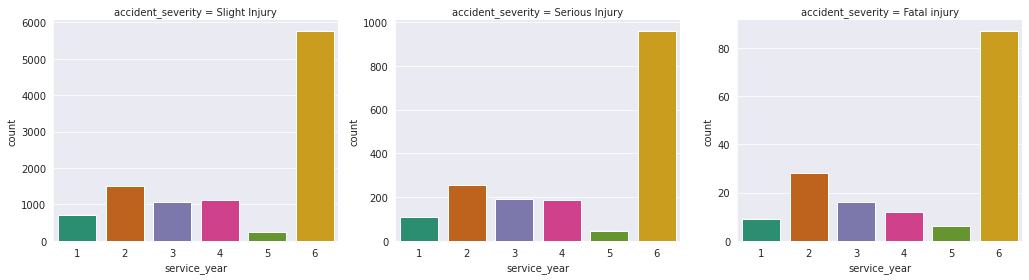

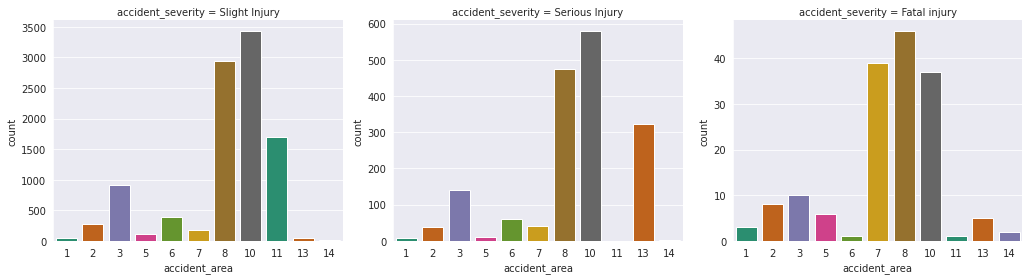

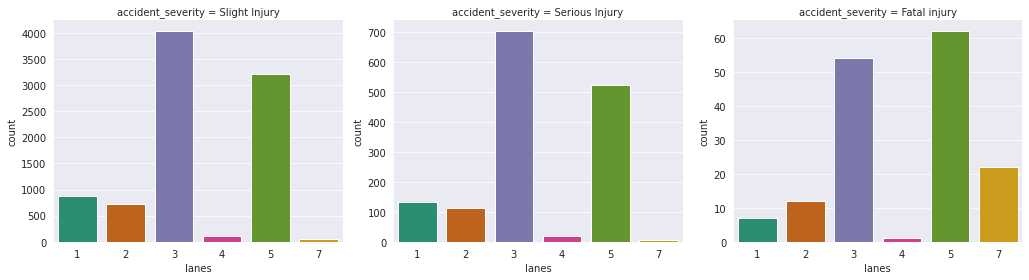

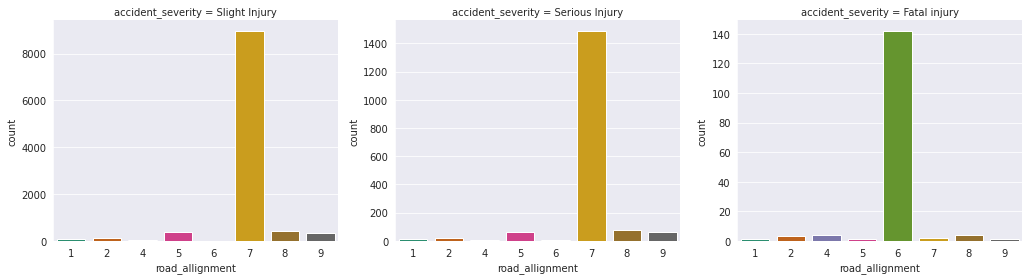

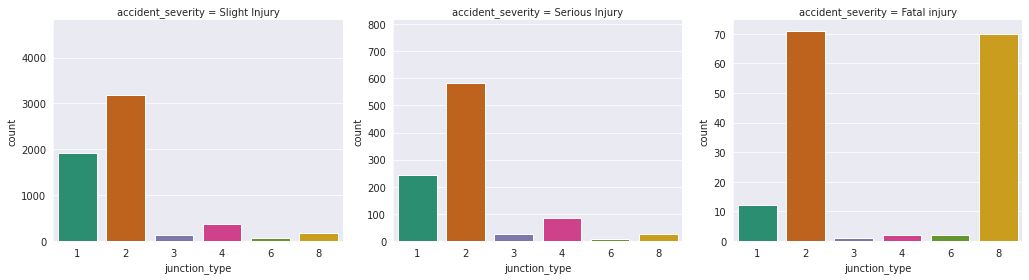

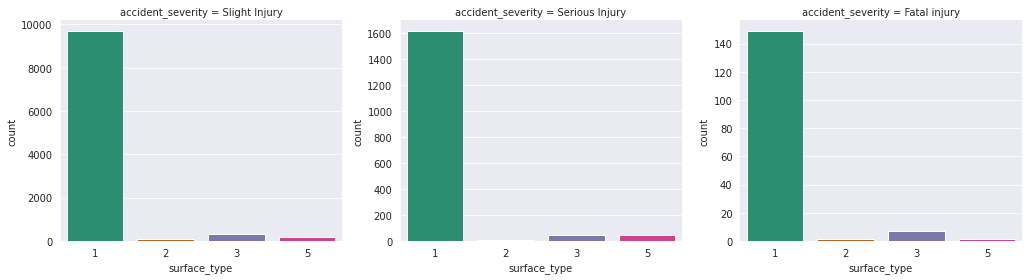

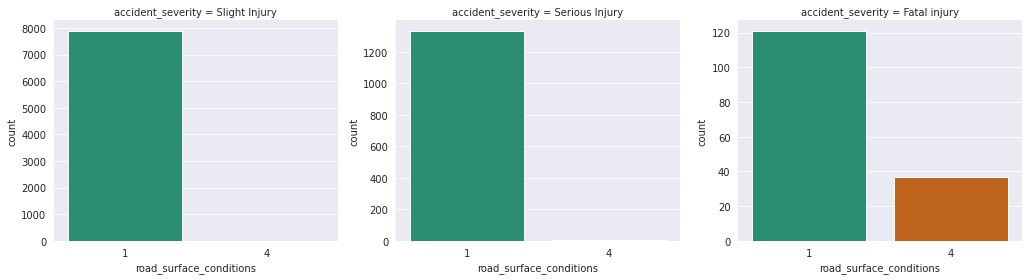

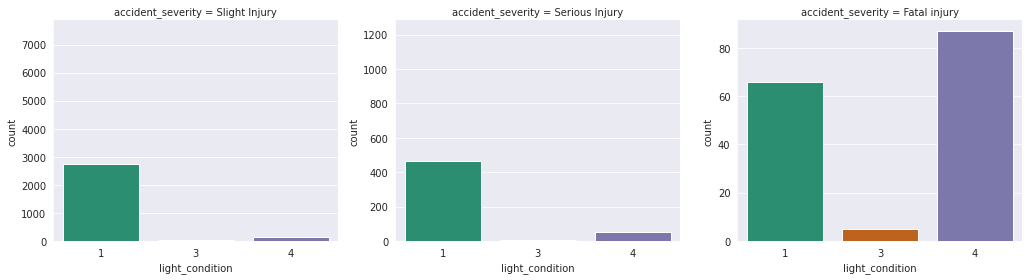

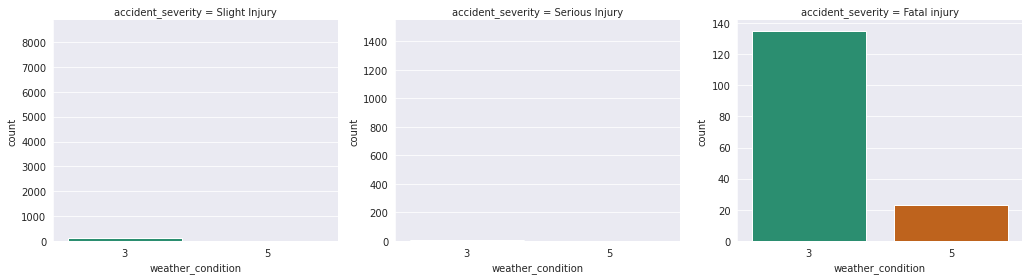

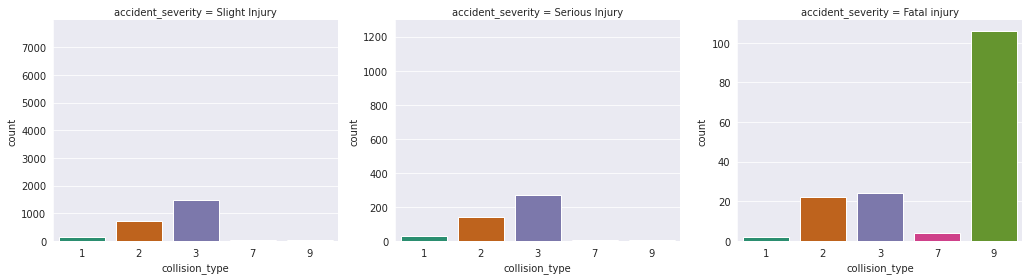

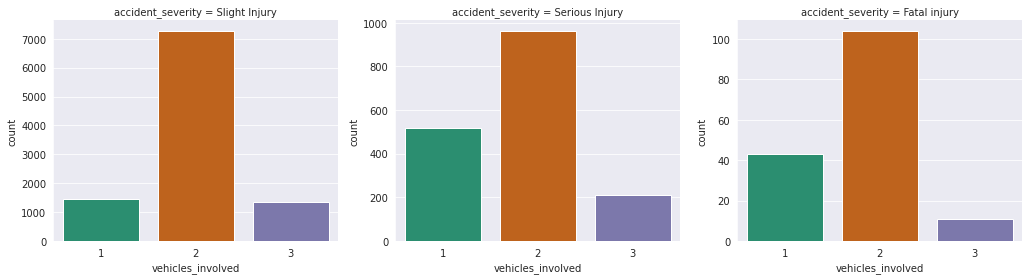

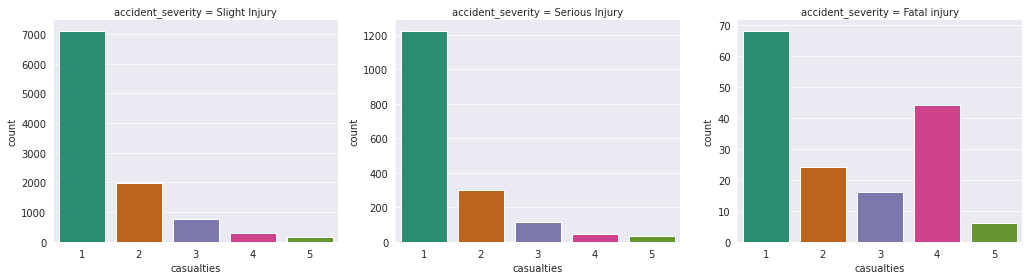

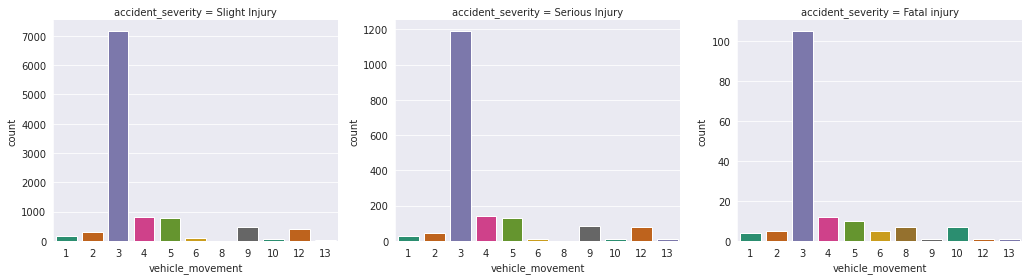

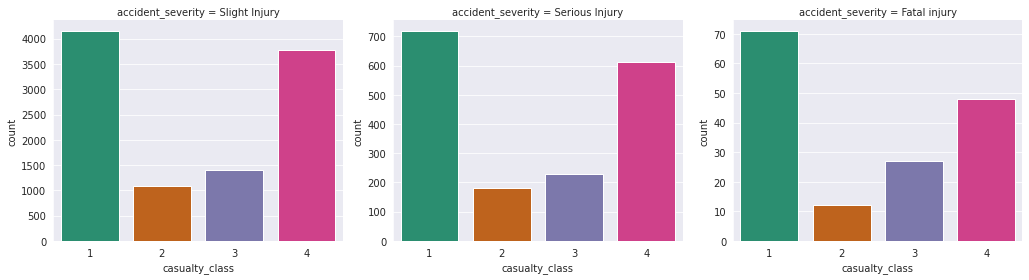

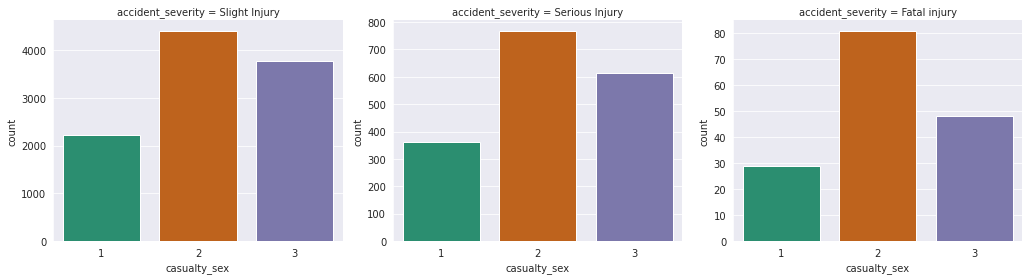

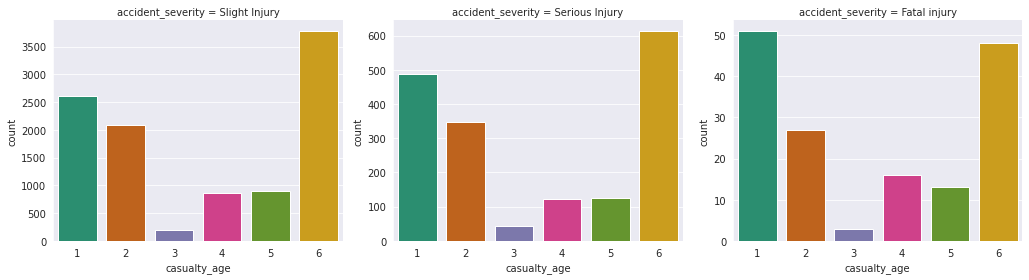

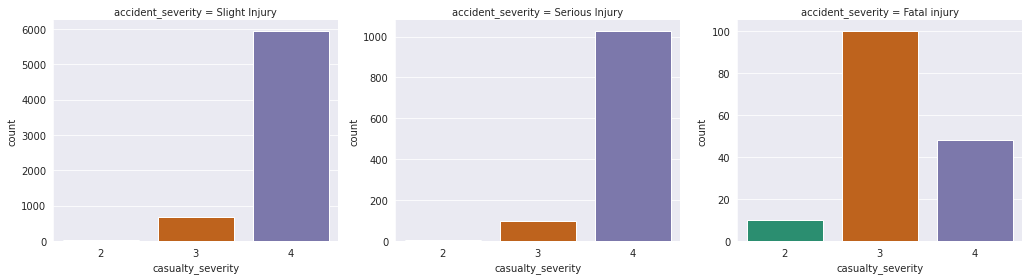

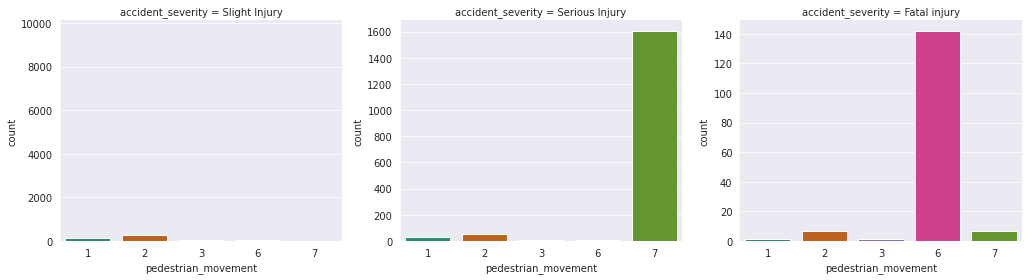

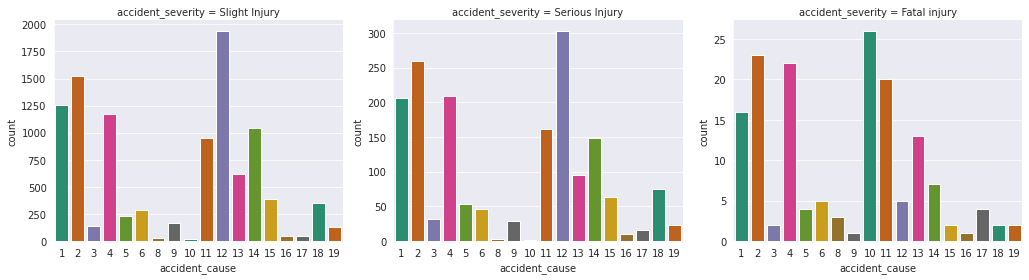

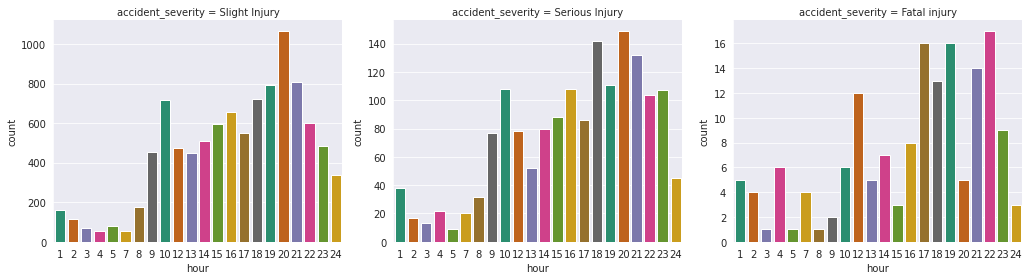

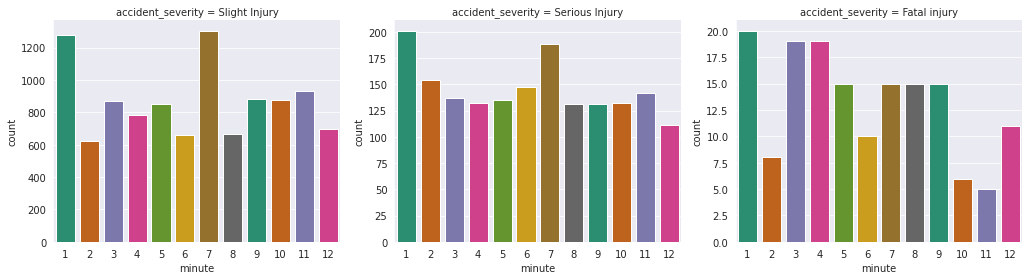

In [ ]:
for col in df.drop('accident_severity', axis=1):
    g = sns.FacetGrid(df, col='accident_severity', size=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

###$Observations$:

* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

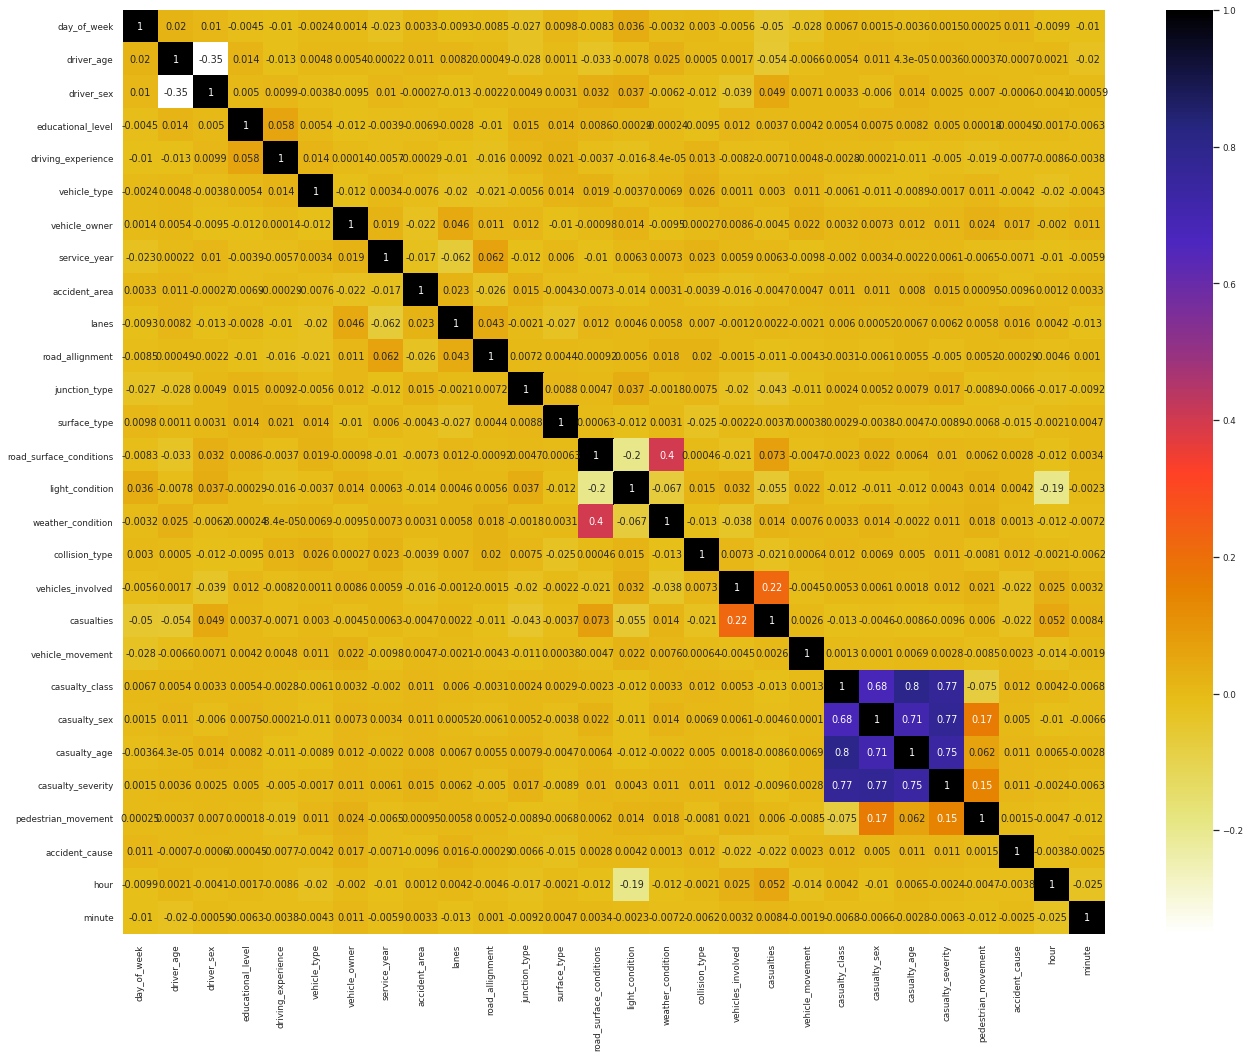

In [ ]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

###$Upsampling$

In [ ]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [ ]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [ ]:
y_test

4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
              ...      
9855      Slight Injury
7302     Serious Injury
9023      Slight Injury
7936      Slight Injury
438       Slight Injury
Name: accident_severity, Length: 3695, dtype: object

In [ ]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

#$Baseline Modeling$#

In [ ]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
#         scores['xgb']['roc_auc'] = roc_auc_score(y_test, y_pred)

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
#         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
#         scores['extree']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(extree)
        
    return scores

In [ ]:
modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)

{'extree': [0.8081190798376184],
 'rf': [0.8032476319350473],
 'xgb': [0.6955345060893099]}

In [ ]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [ ]:
RandomForestClassifier
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [ ]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model_performance(extree,y_test, y_pred)

In [ ]:
#practicing From this cell
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
pred_train=rf.predict(X_train)

#$Hyperparameter Tuning$#

In [ ]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3,
)

extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.8625789206649346)

In [ ]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': None,
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 600},
 0.9223427178935747)

In [ ]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)
y_pred_tuned = extree_tuned.predict(X_test)

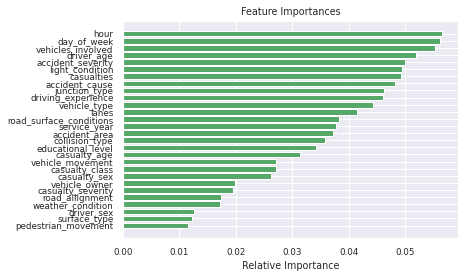

In [ ]:
importances = extree.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#$Explainable AI$#

In [ ]:
!pip install --quiet shap==0.39.0
import shap


     |████████████████████████████████| 356 kB 5.3 MB/s 


while SHAP shows the contribution or the importance of each feature on the prediction of the model, it does not evaluate the quality of the prediction itself

In [ ]:
shap.initjs()

In [ ]:
#we do explainable Ai on 100 samples only due to machine limitations 
X_sample = X_train.sample(100)#here We cheaking out which features affect our model 
X_sample

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,hour,minute
7085,2,2,2,5,3,15,4,6,7,1,6,8,1,1,4,3,9,1,1,3,1,2,1,3,6,4,16,4
8926,4,1,2,5,3,6,4,4,6,5,6,8,1,1,1,3,7,1,2,3,1,2,1,3,6,2,17,5
11779,3,2,2,5,3,3,4,6,10,3,6,2,2,1,4,3,9,1,1,3,1,1,2,3,6,10,15,7
5610,5,2,2,5,1,9,4,6,7,2,6,1,1,1,4,3,9,2,2,3,1,2,2,3,6,1,11,4
931,2,2,2,5,3,1,4,6,7,1,6,8,1,1,4,3,9,1,1,11,1,2,2,3,6,11,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,4,1,2,5,3,1,4,2,7,1,6,2,1,1,4,3,9,2,1,7,1,2,1,3,6,9,16,4
11098,5,2,2,3,1,1,4,3,8,5,6,8,1,2,2,3,5,2,1,3,1,2,1,2,6,2,18,9
5784,5,3,2,5,3,10,4,1,10,3,6,1,4,1,4,3,9,2,1,1,4,3,6,4,6,2,15,9
9927,6,3,2,5,2,8,4,4,5,3,6,5,1,2,2,3,9,1,1,3,4,3,6,4,6,10,19,1


In [ ]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

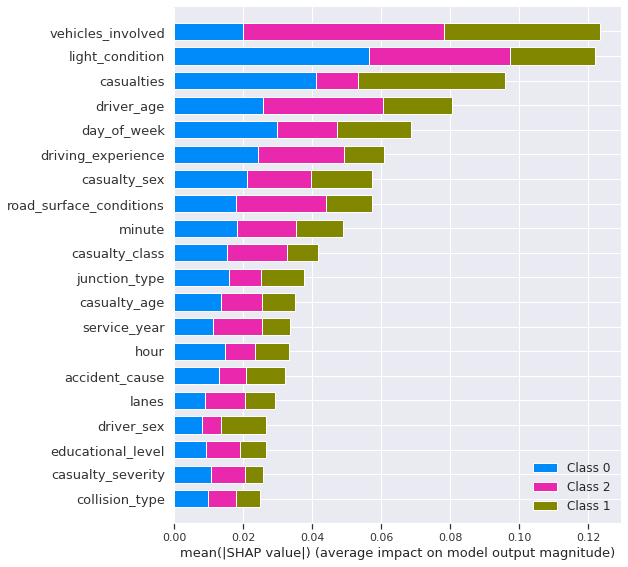

In [ ]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

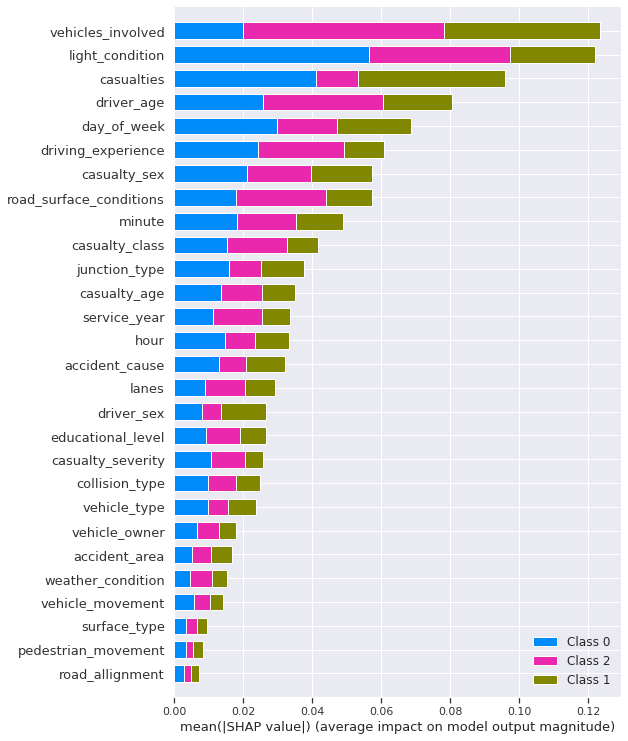

In [ ]:
shap.summary_plot(shap_values, X_sample, max_display=28)

3


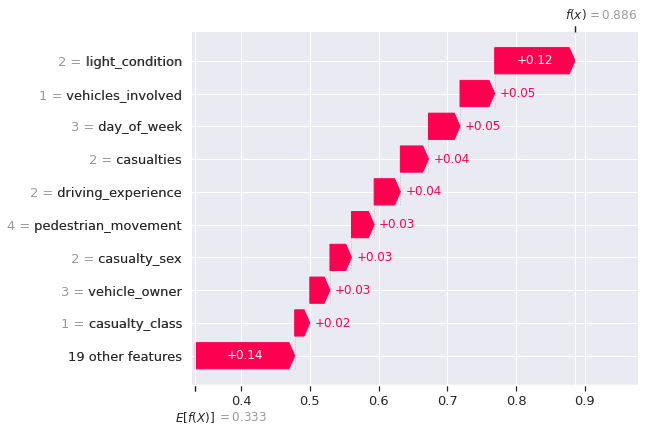

In [ ]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

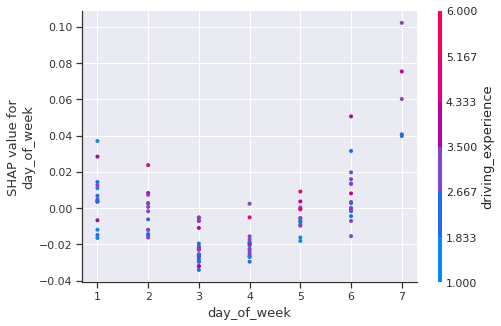

In [ ]:
shap.dependence_plot('day_of_week', shap_values[2], X_sample)

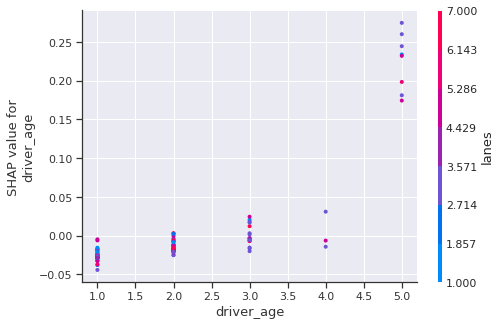

In [ ]:
shap.dependence_plot('driver_age', shap_values[2], X_sample)

3


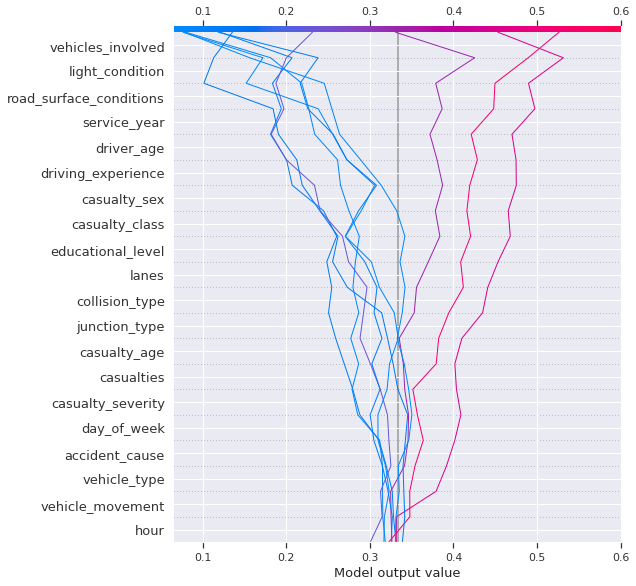

In [ ]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())